In [0]:
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras

In [0]:
def softmax(x):
    temp = np.zeros(x.shape)
    
    for i in range(len(x)):
        temp[i] = np.exp(x[i]) / np.sum(np.exp(x[i]), axis=0)
        
    return temp

In [0]:
def softmax_prime(x):
    return softmax(x) * (1 - softmax(x))

In [0]:
def relu(x):
    return np.where(x > 0, x, x * 0.1)

In [0]:
def relu_prime(x):
    return np.where(x > 0, 1, 0.1)

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [0]:
def sigmoid_prime(x):
    return np.exp(x)/(np.exp(x)+1)**2

In [0]:
def crossEntropy(yHat, y):
    return np.where(y == 1, -np.log(yHat), -np.log(1 - yHat))

In [0]:
"""
Args: 
n_x = number of nodes in the input layer
n_h = number of nodes in the hidden layer
n_y = number of nodes in the output layer

Returns:
network = a dictionary of weights and biases
"""
def init_net(n_x, n_h, n_y):
    
    # set weights and biases
    b1 = np.zeros((n_h, 1))
    w1 = np.random.rand(n_h, n_x) * 0.0001
    b2 = np.zeros((n_y, 1))
    w2 = np.random.rand(n_y, n_h) * 0.0001
    
    network = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }
    
    return network

In [0]:
"""
Args:
network = the dictionary of network weights and biases
inputs = the data to pass through the network

Returns:
network_activations = the predictions the network is making based on the inputs
"""
def forward_prop(network, inputs):
    z1 = np.dot(inputs, network["w1"].T) + network["b1"].T
    a1 = relu(z1)
    z2 = np.dot(a1, network["w2"].T) + network["b2"].T
    a2 = softmax(z2)
    
    network_activations = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    
    return network_activations

In [0]:
"""
Args:
forward_output = the network predictions
labels = the values the network should be predicting

Returns:
cost = a numerical representation of how far off the network predictions are from the desired values
"""
def evaluate_net(forward_output, labels):
    cost = crossEntropy(forward_output, labels)
    return cost

In [0]:
"""
Args:
network = the dictionary of network weights and biases
forward_output = the network predictions
inputs = the data initially passed into the network
labels = the values the network should be predicting

Returns:
gradient = a dictionary of numerical adjustments to make to the weights and biases
"""
def back_prop(network, forward_output, inputs, labels):
    dC_da2 = forward_output["a2"] - labels
    da2_dz2 = softmax_prime(forward_output["z2"])
    error2 = np.multiply(dC_da2, da2_dz2)
    dz2_dw2 = forward_output["a1"].T
    dC_dw2 = np.dot(error2.T, dz2_dw2.T)
    dC_db2 = np.sum(error2.T, axis = 1).reshape(-1, 1)
    
    dz2_da1 = network["w2"]
    da1_dz1 = relu_prime(forward_output["z1"])
    dz1_dw1 = inputs
    error1 = np.multiply(np.dot(error2, dz2_da1), da1_dz1)
    dC_dw1 = np.dot(error1.T, dz1_dw1)
    dC_db1 = np.sum(error1.T, axis = 1).reshape(-1, 1)
    
    gradient = {
        "dC_dw2": dC_dw2,
        "dC_db2": dC_db2,
        "dC_dw1": dC_dw1,
        "dC_db1": dC_db1
    }
    
    return gradient

In [0]:
"""
Args:
network = the dictionary of network weights and biases
inputs = the data to pass through the network

Returns:
predictions = the values the network is predicting based on the input data
"""
def predict(network, inputs):
    forward_outputs = forward_prop(network, inputs)
    predictions = forward_outputs["a2"]
    return predictions

In [0]:
"""
Args:
activations = the network predictions
axis = the axis to check along

Returns:
predictedValue = the position of the highest one hot encoded activation value
"""
def output(activations, axis):
    predictedValue = np.argmax(activations, axis = axis)
    return predictedValue

In [0]:
"""
Args:
network = the dictionary of network weights and biases
inputs = the data to pass through the network
labels = the desired prediction values
learning_rate = the 'speed' at which the network adjusts its weights and biases
show_cost = whether or not to show the cost

Returns:
network = the newly updated dictionary of weights and biases after adjustments
cost = the cost of the network
"""
def learning(network, inputs, labels, learning_rate, show_cost):
    forward_output = forward_prop(network, inputs)
    # print(forward_output)
    gradient = back_prop(network, forward_output, inputs, labels)
    network["w1"] -= gradient["dC_dw1"] * learning_rate
    network["b1"] -= gradient["dC_db1"] * learning_rate
    network["w2"] -= gradient["dC_dw2"] * learning_rate
    network["b2"] -= gradient["dC_db2"] * learning_rate

    cost = np.sum(evaluate_net(forward_output["a2"], labels))
    
    if show_cost:
        print("Cost:", cost)
    
    return network, cost

In [0]:
"""
Args:
array = the values to one hot encode

Returns:
oheArray = an array of arrays in which...
    the inner arrays have a size of 0 to the highest value in the initial array
    the inner arrays are 0 everywhere except for the position of the corresponding value in the initial array
"""
def oneHot(array):
    encoder = OneHotEncoder(sparse = False, categories = 'auto')
    array = array.reshape(-1, 1)
    oheArray = encoder.fit_transform(array)
    return oheArray

In [0]:
def getMnistData():
    mnist = keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    y_train = oneHot(y_train)[0:60000]
    y_test = oneHot(y_test)
    
    x_train_temp = np.zeros((60000, 784))
    for i in range(len(x_train)):
        x_train_temp[i] = x_train[i].flatten()
        
    x_test_temp = np.zeros((10000, 784))
    for i in range(len(x_test)):
        x_test_temp[i] = x_test[i].flatten()
    
    x_train = x_train_temp[0:60000]
    x_test = x_test_temp
    
    x_train = x_train/255
    x_test = x_test/255
    
    return x_train, y_train, x_test, y_test

In [0]:
x_train, y_train, x_test, y_test = getMnistData()

In [0]:
"""
Args: 
inputs = the data to pass through the network
labels = the desired network predictions

Returns:
accuracy = the percentage of predictions the network got right
"""
def findAccuracy(inputs, labels):
    numCorrect = 0
    totalSamples = inputs[:,0].size
    for test_index in range(totalSamples):
        activations = predict(network, inputs[test_index])
        predicted_value = output(activations, axis = 1)
        # print(predicted_value)        
        if (predicted_value == output(labels[test_index], axis=0)):
            numCorrect = numCorrect + 1
    accuracy = str(round(numCorrect / totalSamples * 100)) + "%"
    return accuracy

In [0]:
network = init_net(784, 500, 10)

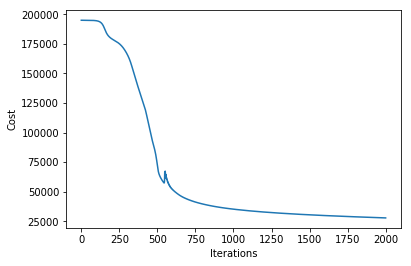

In [0]:
graphCost = True
num_iterations = 2000
learning_rate = 0.00001
costValues = []
for i in range(num_iterations):
    network, cost = learning(network, x_train, y_train, learning_rate, False)
    costValues.append(cost)
    print("Iteration " + str(i + 1) + "/" + str(num_iterations), end = "\r")
    
if graphCost:
    pyplot.plot(np.linspace(0, num_iterations, num_iterations), costValues)
    pyplot.xlabel("Iterations")
    pyplot.ylabel("Cost")
    pyplot.show()

In [0]:
print("Training Accuracy:", findAccuracy(x_train, y_train))
print("Testing Accuracy:", findAccuracy(x_test, y_test))

Training Accuracy: 93%
Testing Accuracy: 93%


In [0]:
"""
Args:
sample_to_display = the index of x_test sample to view

Returns:
prints out the image, actual number, and network prediction
"""
def checkAnswer(sample_to_display):
    pixels = x_test[sample_to_display].reshape(28, 28)
    pyplot.title("Input Image")
    pyplot.imshow(pixels, cmap = "gray")
    pyplot.show()

    print("Actual Number:", output(y_test[sample_to_display], axis = 0))
    print("Network Prediction:", output(predict(network, x_test[sample_to_display]), axis = 1))

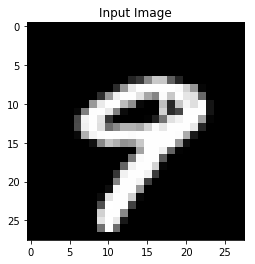

Actual Number: 9
Network Prediction: [9]


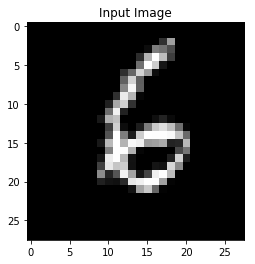

Actual Number: 6
Network Prediction: [6]


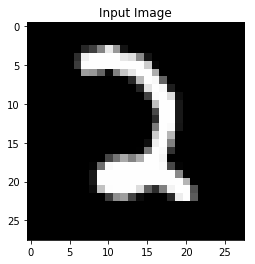

Actual Number: 2
Network Prediction: [2]


In [0]:
checkAnswer(9)
checkAnswer(2000)
checkAnswer(423)